Download Titanic Dataset here: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

#### About this file

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Section 1: Data Loading & Exploration

### **Task 1**: Load and Inspect a Dataset

*Instruction*: Load the `titanic.csv` dataset and display the first 5 rows. Show basic info and describe statistics of the dataset.

In [ ]:
import pandas as pd

try:
    df_titanic = pd.read_csv('titanic.csv')
    display(df_titanic.head())
except FileNotFoundError:
    print("Error: 'titanic.csv' not found.")
    df_titanic = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_titanic = None

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Section 2: Handling Missing Values

### **Task 2**: Identify and Handle Missing Data

*Instruction*:



*   Display the number of missing values per column.
*   Fill missing `Age` values with the median.
*   Drop the second row in the dataset.



In [ ]:
import pandas as pd

# Example dataset (replace this with your actual dataset)
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, None, 30, 22],
    'City': ['New York', 'Los Angeles', None, 'Chicago']
}

df = pd.DataFrame(data)

# 1. Display the number of missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# 2. Fill missing Age values with the median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# 3. Drop the second row (index 1 because Python is 0-indexed)
df.drop(index=1, inplace=True)

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(df)

Missing values per column:
Name    0
Age     1
City    1
dtype: int64

Updated DataFrame:
      Name   Age      City
0    Alice  25.0  New York
2  Charlie  30.0      None
3    David  22.0   Chicago


<ipython-input-1-600db30ac0cb>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


## Section 3: Encoding Categorical Features

### **Task 3**: Convert Categorical to Numeric

*Instruction*: Convert `Sex` and `Pclass` columns to numeric using:


*   Label Encoding for `Sex`
*   One-Hot Encoding for `Pclass`



Shape of the DataFrame: (887, 8)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB

Descriptive Statistics:
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std     

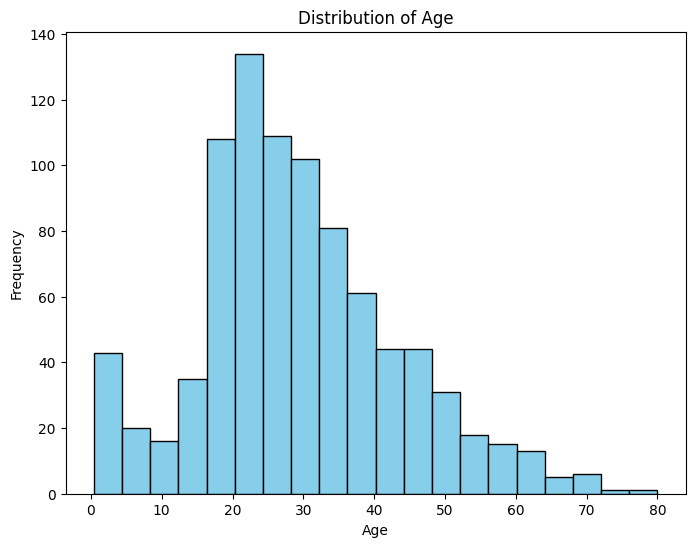


Observations:
Number of passengers: 887
Passenger classes: [3 1 2]
Survival rate: 38.56%


In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df_titanic.shape)

# Get a summary of the DataFrame
print("\nDataFrame Info:")
df_titanic.info()

# Generate descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print(df_titanic.describe())

# Explore categorical features
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    if feature in df_titanic.columns:
        print(f"\nValue counts for {feature}:")
        print(df_titanic[feature].value_counts())
    else:
        print(f"Column '{feature}' not found in the DataFrame.")

import matplotlib.pyplot as plt

# Visualize the distribution of 'Age'
if 'Age' in df_titanic.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_titanic['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Distribution of Age')
    plt.show()
else:
    print("Column 'Age' not found in the DataFrame.")

# Document findings (example)
print("\nObservations:")
print(f"Number of passengers: {df_titanic.shape[0]}")
if 'Pclass' in df_titanic.columns:
    print(f"Passenger classes: {df_titanic['Pclass'].unique()}")
if 'Survived' in df_titanic.columns:
    survived_counts = df_titanic['Survived'].value_counts(normalize=True) * 100
    print(f"Survival rate: {survived_counts[1]:.2f}%")
# Add other observations as needed


## Section 4: Feature Scaling

### **Task 4**: Scale Numerical Features

*Instruction*: Use StandardScaler to scale the Age and Fare columns.*italicized text*

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example dataset (you can replace it with your actual one)
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, None, 30, 22],
    'Fare': [100, 200, 150, 120],
    'City': ['New York', 'Los Angeles', None, 'Chicago']
}

df = pd.DataFrame(data)

# 1. Display missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# 2. Fill missing Age values with the median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# 3. Drop the second row (index 1)
df.drop(index=1, inplace=True)

# 4. Use StandardScaler to scale 'Age' and 'Fare'
scaler = StandardScaler()

# Select columns to scale
columns_to_scale = ['Age', 'Fare']

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the updated DataFrame
print("\nUpdated DataFrame after scaling:")
print(df)


Missing values per column:
Name    0
Age     1
Fare    0
City    1
dtype: int64

Updated DataFrame after scaling:
      Name       Age      Fare      City
0    Alice -0.202031 -1.135550  New York
2  Charlie  1.313198  1.297771      None
3    David -1.111168 -0.162221   Chicago


<ipython-input-2-80d0670ac4f6>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


## Section 5: Feature Engineering

### **Task 5**: Build Preprocessing Pipeline

*Instruction*: Using `ColumnTransformer` and `Pipeline` from `sklearn`, build a pipeline that:



*   Imputes missing values
*   Scales numeric data
*   Encodes categorical data



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns
numeric_features = ["Age", "Fare"]
categorical_features = ["Sex", "Pclass"]

# Numeric pipeline: impute missing values then scale
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline: impute missing values then one-hot encode
categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Full preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass'])])

## Section 6: Feature Engineering

### **Task 6**: Create a New Feature

*Instruction*: Create a new feature `FamilySize` = `Siblings/Spouses Aboard` + `Parents/Children Aboard` + 1.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example dataset (added SibSp and Parch columns)
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, None, 30, 22],
    'Fare': [100, 200, 150, 120],
    'City': ['New York', 'Los Angeles', None, 'Chicago'],
    'SibSp': [1, 0, 2, 1],   # Number of siblings/spouses aboard
    'Parch': [0, 1, 1, 0]    # Number of parents/children aboard
}

df = pd.DataFrame(data)

# 1. Display missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# 2. Fill missing Age values with the median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# 3. Drop the second row (index 1)
df.drop(index=1, inplace=True)

# 4. Use StandardScaler to scale 'Age' and 'Fare'
scaler = StandardScaler()
columns_to_scale = ['Age', 'Fare']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# 5. Create a new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Display the updated DataFrame
print("\nUpdated DataFrame with FamilySize:")
print(df)

Missing values per column:
Name     0
Age      1
Fare     0
City     1
SibSp    0
Parch    0
dtype: int64

Updated DataFrame with FamilySize:
      Name       Age      Fare      City  SibSp  Parch  FamilySize
0    Alice -0.202031 -1.135550  New York      1      0           2
2  Charlie  1.313198  1.297771      None      2      1           4
3    David -1.111168 -0.162221   Chicago      1      0           2


<ipython-input-2-3bfcd3f33578>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
